# The Oldest Profession Is Not What You Think

## Contrary to what you have been told, the oldest profession is actually Journalist:
"a person who writes for newspapers, magazines, or news websites or prepares news to be broadcast."

------------------------------------------------

Author: Carlos Rodrigues


Report_date: xx\_05\_2017

------------------------------------------------

Contrary to what you've heard, **journalist** is the oldest profession in the world, because “In the beginning”, someone had to have been there when Eve and Adam ate the apple from the forbidden tree! Otherwise how could we ever know where humanity began?

However the reality as we know it, started to change...

In [1]:
import pandas as pd
import json
import re
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot
%matplotlib inline

import seaborn as sns

The data was aquired and saved to a file using a separated python script (find on attachment).

In [2]:
# with open('wiki-data-v2.json') as f:
#     content = f.readlines()

In [3]:
# def get_json(string):
#     string = string.replace(',\n', '')
#     return json.loads(string)

In [4]:
# df = pd.DataFrame.from_records(map(get_json, content))

In [5]:
df = pd.read_json('wiki-data-v999')

### The story that follows is told around a chunk of data from Wikipedia (precisly Wikipedia metadata). The fun came up by noticing the top user names per amount of actions performed on Wikipedia!

In [6]:
df.groupby('user')['action'].count() \
                            .reset_index(name='count') \
                            .sort_values(['count'], ascending=False) \
                            .head(10)

,user,count
370,HostBot,199
384,InternetArchiveBot,129
228,BD2412,98
226,AvalerionV,60
385,Iridescent,52
662,William Avery,49
542,Onel5969,49
382,InceptionBot,38
278,Corkythehornetfan,26
251,CAPTAIN RAJU,21


## Fact: some of the usernames end up in "...Bot"

Hum, ok there is a variable that identifies the Bots ("is_bot") but is it trustful? Lets check ourselves if it capture all the obviouse Bot usernames?

In [7]:
bot_df = df[['user', 'action', 'is_bot', 'change_size', 'ns']]
regex = r'.*[bB][oO][tT]'
bot_df['my_is_bot'] = df.user.str.match(regex)
bot_df.head(5)

,user,action,is_bot,change_size,ns,my_is_bot
0,Terriffic Dunker Guy,edit,False,99.0,Main,False
1,VICTOR ERNESTO RODRIGUEZ,create,False,NaN,Special,False
10,M2545,edit,False,445.0,Main,False
100,66.7.227.226,edit,False,-1.0,Main,False
1000,Hyacinth,edit,False,203.0,Category,False


In [8]:
isbot = pd.DataFrame(bot_df.is_bot.value_counts().reset_index())
myisbot = pd.DataFrame(bot_df.my_is_bot.value_counts().reset_index())
check_bots = pd.merge(isbot,myisbot)
check_bots.set_index(check_bots['index']).drop('index', axis = 1)

check_bots

,index,is_bot,my_is_bot
0,False,1972,1759
1,True,222,435


#### Looks like it doesn't!!! Not all the bot usernames are identified through the "is_bot" variable and perhaps there are other bots non explicit by the username!

But why not filter only by the my_is_bot variable? Since we know it capture 435 bot actions?

(Lets create a new dataframe with all possible bots accounts)

In [9]:
bots = bot_df.query('is_bot == True or my_is_bot == True')
bots.user.count()

436

##### 1 row has a username that is not crystal clear!

In [10]:
bots.query("is_bot == True and my_is_bot == False")

,user,action,is_bot,change_size,ns,my_is_bot
645,Ops Monitor (WMF),edit,True,-9.0,User,False


## That's why it is important to never discard data, some important information is the details!

Lets label this dataset as actions performed by humans or bots

In [11]:
# Just to be faster than an df.apply(...)
bot_df['user_or_bot'] = 'human'
bot_df.loc[(bot_df['is_bot'] == True) | (bot_df['my_is_bot'] == True), 'user_or_bot'] = 'bot'
bot_df.user_or_bot.value_counts()

human    1758
bot       436
Name: user_or_bot, dtype: int64

#### 24.8% of the actions were performed by a machines!

What kind of 'Actions' the bots usually perform?

In [12]:
unique_action = bot_df.query("user_or_bot == 'bot'").action.unique()

# Just for the sake of printing the list to show there is only one action, I am using the print as a function,
# which is a "limitation" of python 2.7
from __future__ import print_function
map(lambda x: print(x), unique_action)

edit


[None]

### Lets visualise the impact in terms of content changed by humans or bots, in Wikipedia!

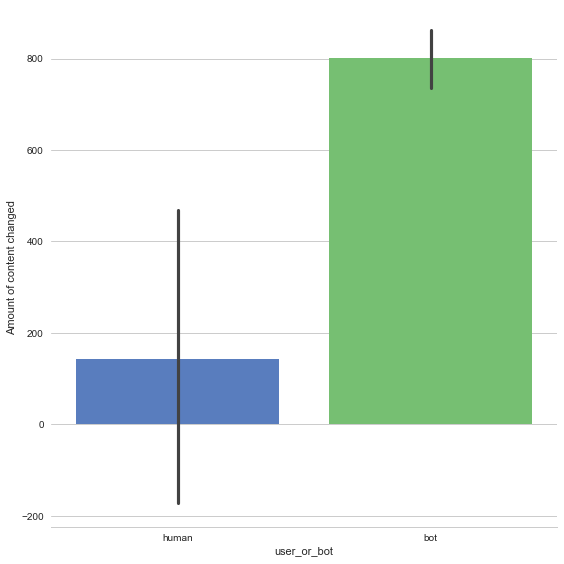

In [13]:
sns.set(style="whitegrid")

g = sns.factorplot(x="user_or_bot", y="change_size", data=bot_df,
                   size=8, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("Amount of content changed")

## Lets pick up from our story

### Wikipedia is the largest and most popular general reference work on the Internet (launched at 2001)

### Nowadays the content generated or removed from it, is mainly managed and generated by AI, in this case bots!

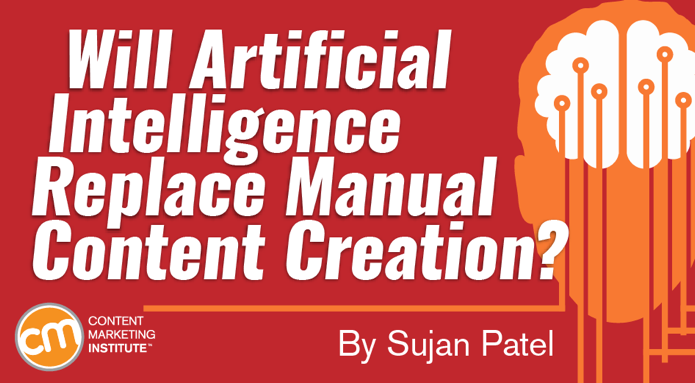

In [14]:
from IPython.display import Image
Image(filename='image2.png')

# Image source:
# http://contentmarketinginstitute.com/2017/03/artificial-intelligence-manual-creation/
# (Good opinion article for further reading) 

### Certainly a question that I cannot answer, but maybe the dataset can give us an hint!?

In [15]:
bot_df['action_count'] = 1

Selecting only the entries where the action is "edit" because:
 - other actions have NaN values 
 - not bias the analyse since the bots are just present on "edit" actions

In [16]:
bot_df['change_size'] = bot_df['change_size'].abs()
grouped_df = bot_df.query('action == "edit"').groupby('user')[['change_size', 'action_count', 'user_or_bot']].sum()
grouped_df.reset_index(level=0, inplace=True)

joined_df = grouped_df.merge(bot_df[['user', 'user_or_bot']], on='user', how='left').drop_duplicates()

In [17]:
joined_df.user_or_bot.value_counts()

human    618
bot       25
Name: user_or_bot, dtype: int64

##### Only 25 different Bots are presented in this dataset

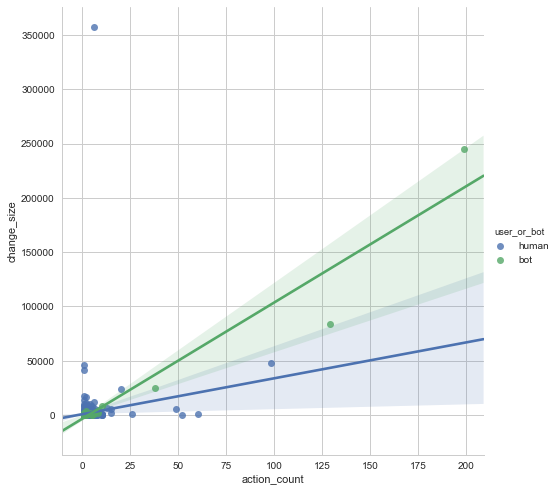

In [18]:
g2 = sns.lmplot(y="change_size", x="action_count", hue="user_or_bot", data=joined_df, size=7)

### To conclude, it is a fact that Wikipedia, the largest center of information, is actually maily managed by Bots.

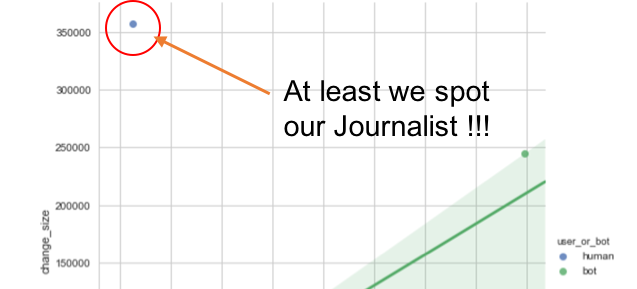

In [19]:
Image(filename='journalist1.png')

(**note**: we found an outlier which has the human characterictc and and unlikely amount of "change_size", following the initial story we can say he is a "journalist"!)

## Attachement #1

Code used to receive JSONs from wikimon websocket into a file.

import time
from websocket import create_connection
import json

def get_time():
    return time.asctime(time.localtime(time.time())).split(' ')[3]

ws = create_connection("ws://wikimon.hatnote.com:9000")

f = open('wiki-data-v21.json', 'w')

t_end = time.time() + 10 * 90

while time.time() < t_end:
    result =  ws.recv()
    result = json.loads(result)
    result[u'timestamp'] = get_time()
    json.dump(result, f)
    f.write(',\n')

f.close()